<h2>Analyzing AI Models for Quality</h2>
This exercise allows students to review various experimentation results and validate the model is acceptabl for use.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import ensemble, datasets, metrics, model_selection, preprocessing, pipeline

<h2>Analyze dataset training/testing split</h2>
Review how data was split between training and testing sets.

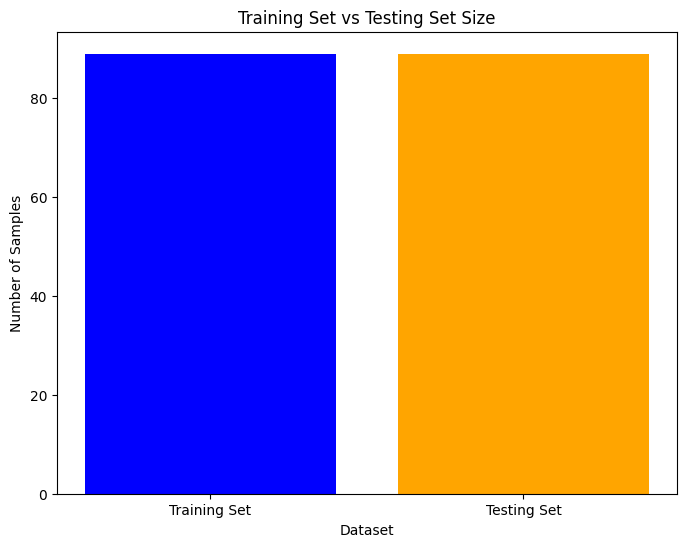

In [2]:
try:
    wine_data = pd.read_csv('wine_dataset.csv')
except:
    raise Exception("Could not load wine dataset")

try:
    X = wine_data.drop('target', axis =1)
    y = wine_data['target']
except:
    raise Exception("Could not extract data")

train_size = 0.5

# Split the wine dataset and create inputs (x variables) & labeled outputs (y variables) for supervised training
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=train_size, 
                                                                        stratify=y)

# Calculate the sizes of the training and testing sets
train_set_size = len(X_train)
test_set_size = len(X_test)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Training Set', 'Testing Set'], [train_set_size, test_set_size], color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Training Set vs Testing Set Size')
plt.show()



<h2>Analyze dataset distribution</h2>
Review how data was split to assure sufficient examples of each wine variation are present in training and testing data

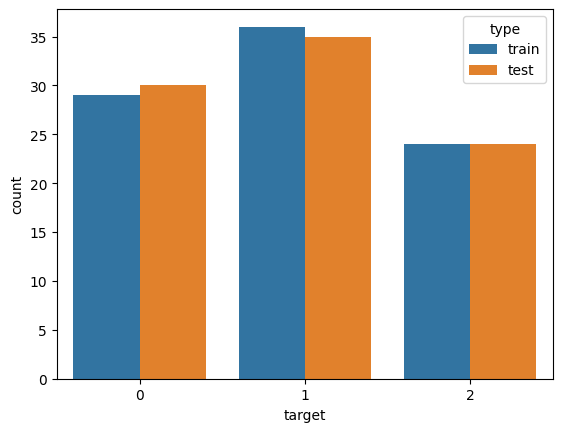

In [3]:
# put data in classes so it can be shown in a graph below
df_train = pd.DataFrame(y_train, columns=['target'])
df_train['type'] = 'train'

df_test = pd.DataFrame(y_test, columns=['target'])
df_test['type'] = 'test'

df_set = pd.concat([df_train, df_test], ignore_index=True)

# Show training vs testing datasets by wine type
_ = sns.countplot(x='target', hue='type', data=df_set)     

<h2>Review Experimentation Results</h2>
Examine experimentation results to determine the validity of the selected mode

Experiment 1: Default Parameters
<br>Hyperparameters: Default values
<br>Metrics: Accuracy: 82%, Precision: 80%, Recall: 75%, F1-score: 77%

Experiment 2: Increased Number of Estimators
<br>Hyperparameters: n_estimators=200
<br>Metrics: Accuracy: 83%, Precision: 82%, Recall: 76%, F1-score: 79%

Experiment 3: Adjusted Maximum Depth
<br>Hyperparameters: max_depth=10
<br>Metrics: Accuracy: 81%, Precision: 80%, Recall: 77%, F1-score: 78%

Experiment 4: Optimized Hyperparameters with Grid Search
<br>Hyperparameters: (Optimized using Grid Search)
n_estimators=150
max_depth=8
min_samples_split=5
min_samples_leaf=2
<br>Metrics: Accuracy: 84%, Precision: 83%, Recall: 78%, F1-score: 80%

Experiment 5: Feature Engineering (Added New Wine Attribute)
<br>Hyperparameters: Optimized using Grid Search
<br>Metrics: Accuracy: 85%, Precision: 84%, Recall: 80%, F1-score: 82%